<a href="https://colab.research.google.com/github/anas1IA-art/Custom_data/blob/main/Custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare the data

In [109]:
import requests
import zipfile
from pathlib import Path

In [110]:
# Step 1: Download the specific gzip files
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz


--2024-08-29 16:12:58--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz [following]
--2024-08-29 16:12:58--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [application/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M   131MB/s    in 0.

In [111]:
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz

--2024-08-29 16:12:59--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz [following]
--2024-08-29 16:12:59--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29515 (29K) [application/octet-stream]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.82K  --.-KB/s    in 0.002

In [112]:
# Step 2: Extract the gzip files
!gzip -d train-images-idx3-ubyte.gz
!gzip -d train-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz

gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? ^C
gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? ^C
gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? ^C
gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? ^C


In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
# Define the directory structure
base_dir = 'fashion_mnist_dataset'

if os.path.isdir(base_dir):
    print(f"{base_dir} directory exists.")
else:
    print(f"Did not find {base_dir} directory, creating one...")
    os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
classes = ['tshirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


fashion_mnist_dataset directory exists.


In [3]:
# Create the directory structure
for d in [train_dir, test_dir]:
    os.makedirs(d, exist_ok=True)
    for c in classes:
        os.makedirs(os.path.join(d, c), exist_ok=True)

In [4]:
# Paths to the extracted files
train_images_path = 'train-images-idx3-ubyte'
train_labels_path = 'train-labels-idx1-ubyte'
test_images_path = 't10k-images-idx3-ubyte'
test_labels_path = 't10k-labels-idx1-ubyte'

In [5]:
# Helper function to load MNIST data
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>u4')[0]
        num = np.frombuffer(f.read(4), dtype='>u4')[0]
        rows = np.frombuffer(f.read(4), dtype='>u4')[0]
        cols = np.frombuffer(f.read(4), dtype='>u4')[0]
        print(f"Magic number: {magic}, Number of images: {num}, Rows: {rows}, Columns: {cols}")
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)
    return images

In [6]:
def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>u4')[0]
        num = np.frombuffer(f.read(4), dtype='>u4')[0]
        print(f"Magic number: {magic}, Number of labels: {num}")
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

In [7]:
def save_images(images, labels, base_dir,new_size=(56, 56)):
    for idx, (image, label) in enumerate(zip(images, labels)):
        class_name = classes[label]
        image_dir = os.path.join(base_dir, class_name)
        image_path = os.path.join(image_dir, f'image_{idx:04d}.jpeg')
        image = Image.fromarray(image)
        image = image.resize(new_size, Image.ANTIALIAS)
        image.save(image_path)

In [8]:
# Load and save training images
train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
save_images(train_images, train_labels, train_dir,new_size=(28,28))

Magic number: 2051, Number of images: 60000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 60000


<ipython-input-7-81941a92c02b>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_size, Image.ANTIALIAS)


In [9]:
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)
save_images(test_images, test_labels, test_dir,new_size=(28,28))

Magic number: 2051, Number of images: 10000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 10000


<ipython-input-7-81941a92c02b>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_size, Image.ANTIALIAS)


In [10]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [11]:
walk_through_dir("./fashion_mnist_dataset")

There are 2 directories and 0 images in './fashion_mnist_dataset'.
There are 10 directories and 0 images in './fashion_mnist_dataset/train'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/bag'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/sandal'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/tshirt_top'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/trouser'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/coat'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/sneaker'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/pullover'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/shirt'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/ankle_boot'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/dress'.
There are 10 directories

In [12]:
import random
from pathlib import Path
from PIL import Image

In [13]:
random.seed(42)
base_dir = Path('./fashion_mnist_dataset')

list_images = list(base_dir.glob("*/*/*.jpeg"))

In [14]:
image_path = random.choice(list_images)

In [15]:
image_path

PosixPath('fashion_mnist_dataset/train/tshirt_top/image_10191.jpeg')

In [16]:
image_class = image_path.parent.stem

In [17]:
image = Image.open(image_path)

In [18]:
print(f'path of image is : {image_path}')
print(f' Image class is : {image_class} ')
print(f'Image height is :{image.height}')
print(f'Image with is : {image.width}')



path of image is : fashion_mnist_dataset/train/tshirt_top/image_10191.jpeg
 Image class is : tshirt_top 
Image height is :28
Image with is : 28


In [19]:
image

We can do the same with **matplotlib.pyplot.imshow()**, except we have to convert the image to a NumPy array first.

In [20]:
import matplotlib.pyplot as plt
import numpy as np


In [21]:
from numpy import asarray

In [22]:
numpydata = asarray(image)

In [23]:
numpydata

array([[  0,   2,   2,   0,   0,   5,   4,   0,   0, 111, 187,  52,   7,
          0,   2,  20, 222, 152,  12,   0,   4,   0,  13,   0,   0,   0,
          0,   0],
       [  0,   3,   3,   0,   0,   0,   1,   0,  14, 160, 197, 205, 231,
        135, 166, 250, 182, 211, 113,   7,  13,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   3,   3,   0,   0,   0,   2,   3,   0, 133, 169, 171, 235,
        255, 248, 230, 115, 204, 148,   0,   9,   0,   0,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   5,   5,   8, 151, 196, 177, 190,
        234, 216, 198, 157, 202, 159,   0,  10,   1,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   4,   2,   0,   8, 205, 185, 192, 198,
        166, 173, 192, 200, 200, 186,  50,   5,   0,   2,   0,   0,   0,
          0,   0],
       [  2,   0,   0,   0,   2,   0,   0,   0, 112, 219, 193, 181, 195,
        210, 198, 185, 174, 183, 213, 127,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   2,  12, 210, 177, 196, 191, 178,
        198, 181, 208, 179, 187, 216, 188,   0,   0,   9,   0,   0,   0,
          0,   0],
       [  0,   0,   4,   4,   0,   0,  13,  33, 198, 193, 158, 174, 204,
        186, 175, 192, 179, 162, 164, 191,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   2,   2,   0,   0,   9,  26, 187, 175, 154, 174, 193,
        181, 185, 192, 172, 138, 172, 165,   0,   3,   3,   2,   0,   0,
          0,   0],
       [  0,   0,   2,   3,   0,   0,   3,  14, 190, 186, 165, 176, 189,
        178, 181, 184, 179, 155, 181, 160,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   4,   2,   0,   0,   1, 187, 195, 176, 176, 180,
        172, 176, 173, 179, 172, 188, 149,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   2,   0,   0,   0, 175, 195, 182, 173, 172,
        167, 172, 166, 171, 178, 190, 134,   0,   9,   0,   3,   0,   0,
          0,   0],
       [  2,   0,   0,   0,   1,   3,   1,   0, 164, 192, 183, 172, 170,
        168, 175, 168, 166, 178, 190, 123,   0,   7,   0,   2,   0,   0,
          0,   0],
       [  2,   2,   0,   0,   0,   3,   4,   2, 159, 190, 184, 176, 174,
        172, 179, 173, 170, 177, 193, 122,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   3,   3,   0,   0,   2,   3,   0, 159, 188, 183, 179, 177,
        171, 177, 173, 177, 174, 197, 127,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   4,   6,   0,   0,   0,   0,   0, 160, 186, 181, 179, 177,
        168, 172, 169, 180, 171, 199, 133,   6,   1,   7,   1,   0,   0,
          0,   0],
       [  0,   0,   6,   0,   0,   0,  11,   0, 166, 181, 187, 178, 170,
        171, 174, 173, 178, 163, 182, 150,   0,   3,   8,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,  10,   0,   0,   8, 180, 182, 181, 175, 172,
        173, 173, 172, 176, 173, 175, 166,   3,   1,   3,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,  11,   0,   0,  77, 195, 183, 173, 172, 174,
        174, 172, 171, 172, 182, 166, 184,  32,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   2,   1,   0,   2,   0,   0, 164, 196, 180, 169, 173, 176,
        172, 170, 172, 170, 180, 162, 191,  82,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   2,   1,   1,   0,   0,  16, 201, 187, 176, 171, 176, 178,
        172, 170, 174, 169, 170, 164, 185, 136,   0,   7,   0,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   2,   0,  39, 187, 180, 177, 176, 178, 178,
        174, 174, 176, 171, 165, 169, 177, 171,   5,   6,   0,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   0,   1,  78, 182, 181, 182, 180, 177, 178,
        181, 179, 175, 174, 168, 173, 174, 179,  14,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   7,   0,   0,   0, 113, 199, 186, 187, 181, 174, 178,
        186, 184, 174, 176, 174, 174, 176, 174,  20,   0,   9,   0,   0,
          0,   0],
       [  0,   0,   5,   0,   0,   0, 15

In [24]:
np_img = np.array(image)

In [25]:
np_img

array([[  0,   2,   2,   0,   0,   5,   4,   0,   0, 111, 187,  52,   7,
          0,   2,  20, 222, 152,  12,   0,   4,   0,  13,   0,   0,   0,
          0,   0],
       [  0,   3,   3,   0,   0,   0,   1,   0,  14, 160, 197, 205, 231,
        135, 166, 250, 182, 211, 113,   7,  13,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   3,   3,   0,   0,   0,   2,   3,   0, 133, 169, 171, 235,
        255, 248, 230, 115, 204, 148,   0,   9,   0,   0,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   5,   5,   8, 151, 196, 177, 190,
        234, 216, 198, 157, 202, 159,   0,  10,   1,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   4,   2,   0,   8, 205, 185, 192, 198,
        166, 173, 192, 200, 200, 186,  50,   5,   0,   2,   0,   0,   0,
          0,   0],
       [  2,   0,   0,   0,   2,   0,   0,   0, 112, 219, 193, 181, 195,
        210, 198, 185, 174, 183, 213, 127,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   2,  12, 210, 177, 196, 191, 178,
        198, 181, 208, 179, 187, 216, 188,   0,   0,   9,   0,   0,   0,
          0,   0],
       [  0,   0,   4,   4,   0,   0,  13,  33, 198, 193, 158, 174, 204,
        186, 175, 192, 179, 162, 164, 191,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   2,   2,   0,   0,   9,  26, 187, 175, 154, 174, 193,
        181, 185, 192, 172, 138, 172, 165,   0,   3,   3,   2,   0,   0,
          0,   0],
       [  0,   0,   2,   3,   0,   0,   3,  14, 190, 186, 165, 176, 189,
        178, 181, 184, 179, 155, 181, 160,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   4,   2,   0,   0,   1, 187, 195, 176, 176, 180,
        172, 176, 173, 179, 172, 188, 149,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   2,   0,   0,   0, 175, 195, 182, 173, 172,
        167, 172, 166, 171, 178, 190, 134,   0,   9,   0,   3,   0,   0,
          0,   0],
       [  2,   0,   0,   0,   1,   3,   1,   0, 164, 192, 183, 172, 170,
        168, 175, 168, 166, 178, 190, 123,   0,   7,   0,   2,   0,   0,
          0,   0],
       [  2,   2,   0,   0,   0,   3,   4,   2, 159, 190, 184, 176, 174,
        172, 179, 173, 170, 177, 193, 122,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   3,   3,   0,   0,   2,   3,   0, 159, 188, 183, 179, 177,
        171, 177, 173, 177, 174, 197, 127,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   4,   6,   0,   0,   0,   0,   0, 160, 186, 181, 179, 177,
        168, 172, 169, 180, 171, 199, 133,   6,   1,   7,   1,   0,   0,
          0,   0],
       [  0,   0,   6,   0,   0,   0,  11,   0, 166, 181, 187, 178, 170,
        171, 174, 173, 178, 163, 182, 150,   0,   3,   8,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,  10,   0,   0,   8, 180, 182, 181, 175, 172,
        173, 173, 172, 176, 173, 175, 166,   3,   1,   3,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,  11,   0,   0,  77, 195, 183, 173, 172, 174,
        174, 172, 171, 172, 182, 166, 184,  32,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   2,   1,   0,   2,   0,   0, 164, 196, 180, 169, 173, 176,
        172, 170, 172, 170, 180, 162, 191,  82,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   2,   1,   1,   0,   0,  16, 201, 187, 176, 171, 176, 178,
        172, 170, 174, 169, 170, 164, 185, 136,   0,   7,   0,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   2,   0,  39, 187, 180, 177, 176, 178, 178,
        174, 174, 176, 171, 165, 169, 177, 171,   5,   6,   0,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   0,   1,  78, 182, 181, 182, 180, 177, 178,
        181, 179, 175, 174, 168, 173, 174, 179,  14,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   7,   0,   0,   0, 113, 199, 186, 187, 181, 174, 178,
        186, 184, 174, 176, 174, 174, 176, 174,  20,   0,   9,   0,   0,
          0,   0],
       [  0,   0,   5,   0,   0,   0, 15

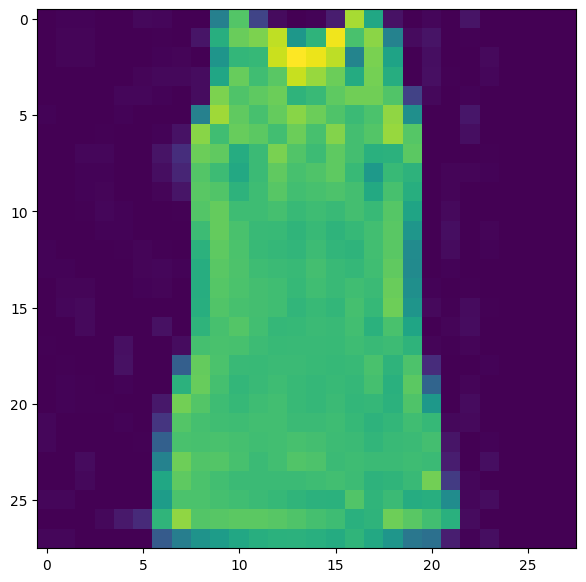

In [26]:
plt.figure(figsize=(10, 7))
plt.imshow(np_img)

## Transforming data

In [27]:
import torch
from torchvision import datasets ,transforms

Transform the data using **torchvision.datasets** for loading our dataset and **torchvision.transform** for preparing our data

I 'm going to build a  to create a custom Dataste to replacite ImageFolder
let's break  down

1 : create subclass  of *torch.utils.data.Dataset*

2 : as intialize our subclass with *targ_dir paremater* (the trajectoire of our data directory )  and  *transform* ( so we have the option of transform our data  if we  needed )

3:  create several attributes  like *paths* (paths for images )  and *trabsform* (the transform we can use it if we like but if not we can intialize it as  None )  class_names and classses _to_index ( we can create a function that return classes_names and classes_to_index we named as *find_classes()*)

4 : create a function  to load images from file and returm them

5 : overwrite the function __len__ method  of torch.utile.data.dataset that return the number of samples that exist  in the Dataset ,this is recommended but is not required

6 :  overwrite the fucntion __getitem__ method  of torch.utile.dataset to return  a single sample from dataset , this is required

Lest 's code that

In [28]:
from torch.utils.data import Dataset

from typing import List ,Tuple ,Dict

In [29]:
def  find_class (directory :str )-> Tuple[List[str],Dict[str ,int]]:

  classes  = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir() or entry.is_file())

  classes_to_index = {cols_name:i for i , cols_name in enumerate(classes)}

  return classes ,classes_to_index

In [30]:
find_class(test_dir)

(['ankle_boot',
  'bag',
  'coat',
  'dress',
  'pullover',
  'sandal',
  'shirt',
  'sneaker',
  'trouser',
  'tshirt_top'],
 {'ankle_boot': 0,
  'bag': 1,
  'coat': 2,
  'dress': 3,
  'pullover': 4,
  'sandal': 5,
  'shirt': 6,
  'sneaker': 7,
  'trouser': 8,
  'tshirt_top': 9})

In [31]:
 l = list(base_dir.glob("*/*/*.jpeg"))
 l[5].parent.name

'bag'

In [95]:
# import torch
# from PIL import Image
# from torchvision import transforms

# def transform_to_tensor(image: Image.Image) -> torch.Tensor:
#     transform = transforms.Compose([
#         transforms.Resize((28, 28)),  # Pass a tuple here
#         transforms.ToTensor(),
#         transforms.RandomVerticalFlip(p=0.5)
#     ])

#     return transform(image)


In [97]:
 def transfom_ToTenser(image: Image.Image) ->torch.Tensor:
  transform = transforms.Compose([transforms.Resize((64,64)),
                                  transforms.ToTensor(),
                                  transforms.RandomVerticalFlip(p = 0.5)])

  return transform(image)





In [98]:
transfom_ToTenser(image)

tensor([[[0.0157, 0.0157, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
         [0.0118, 0.0118, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
         [0.0078, 0.0078, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000]]])

In [99]:
import torch
import os
import pathlib
import torch


In [100]:
len(list(pathlib.Path('fashion_mnist_dataset').glob('*/*/*.jpeg')))

70000

In [101]:
# from typing_extensions import

class DatasetImageFolder(Dataset):

  def __init__(self, targ_dir: str , transform = None ):

      # super().__init__()
      self.targ_dir =  targ_dir
      self.transform = transform
      self.paths =list(pathlib.Path(targ_dir).glob('*/*.jpeg'))
      self.classes , self.classes_to_index = find_class(targ_dir)

  # create a function to load image,s from file and returm them
  def load_images(self, idex: int  )->Image.Image:

    Image = self.paths[idex]

    return Image.open(Image)
  #overwrite the function len method of torch.utile.data.dataset that return the number of samples that exist in the Dataset ,this is recommended but is not required
  def __len__(self)->int:

    return len(self.paths)

  def __getitem__(self, index)->Tuple[torch.Tensor,int]:

    image = self.load_images(idex=index)

    class_name  = self.paths[index].parent.name

    class_idex = self.classes_to_index[class_name]

    if self.transform :

      return self.transform(image),class_idex

    else:

      return image,class_idex

In [105]:


instance  = DatasetImageFolder(targ_dir = train_dir ,transform =  transfom_ToTenser)

In [106]:
len(instance)

60000

In [107]:
instance.classes_to_index

{'ankle_boot': 0,
 'bag': 1,
 'coat': 2,
 'dress': 3,
 'pullover': 4,
 'sandal': 5,
 'shirt': 6,
 'sneaker': 7,
 'trouser': 8,
 'tshirt_top': 9}

In [110]:
# instance[0]

TypeError: argument of type 'PosixPath' is not iterable